<a href="https://colab.research.google.com/github/sujal003-hue/Upgrade-Capstone-Project/blob/main/Churn_customers_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading Our Dataset**

In [ ]:
import zipfile

with zipfile.ZipFile('/content/Telco_customer_churn.xlsx.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
df = pd.read_excel("/content/Telco_customer_churn.xlsx")


# **Display Top 5 Rows of Our Dataset**

In [ ]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


# **Display Last 5 Rows of Our Dataset**

In [ ]:
df.tail()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,...,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


# **Get the Imformation About Our Dataset Like Total Numbers of Rows, Columns, Datatype of Each Column And Memory Requirement**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

**Replacing blank with 0 as tenure is 0 and no total charges are recorded**

In [ ]:
df["Total Charges"] =  df["Total Charges"].replace(" ","0")
df["Total Charges"] = df["Total Charges"].astype("float")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

# **Check Null Values In Our Dataset**

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


# **Statistical Measure of Our Dataset**

In [ ]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2279.734304,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.794470,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,398.550000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1394.550000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3786.600000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


# **Check the Numbers of Rows And Columns in Our Dataset**

In [ ]:
df.shape

(7043, 33)

# **Check the Duplicate Values in Our Dataset**

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df["Senior Citizen"] = df["Senior Citizen"].apply(conv)

**Converting 0 and 1 values of senior citzens to yes/no to make it easier to understand**

**Display Top 5 Rows of Our Dataset**

In [ ]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


# **Data Visualization through Barplot**

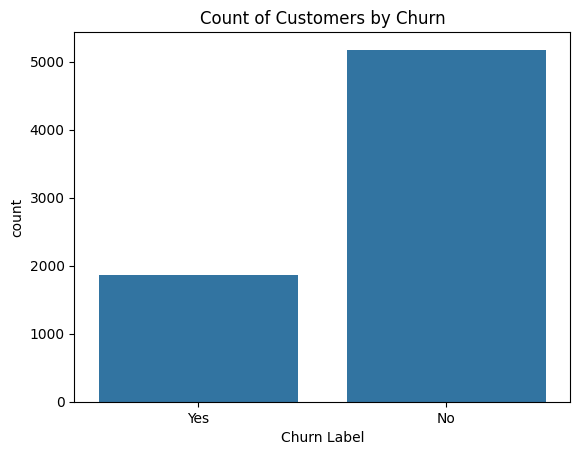

In [ ]:
sns.countplot(x = df['Churn Label'], data = df)
plt.title("Count of Customers by Churn")
plt.show()

# **Data Visualization through Pie Chart**

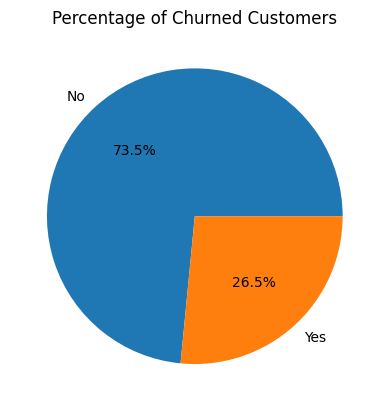

In [ ]:
gb = df.groupby("Churn Label").agg({'CustomerID':'count'}).reset_index()
plt.pie(gb['CustomerID'], labels=gb['Churn Label'], autopct='%1.1f%%')
plt.title("Percentage of Churned Customers")
plt.show()

**From above pie chart we can conclude that 26.5% of our customers have churned out.**

# **Let's explore reason behind that**

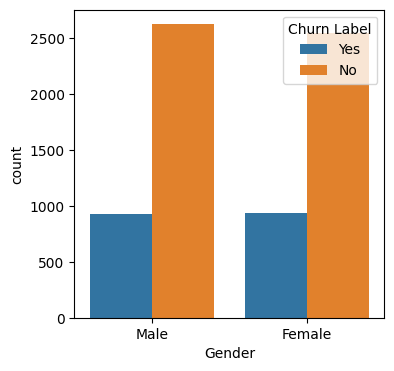

In [ ]:
plt.figure(figsize = (4,4))
sns.countplot(x = "Gender", data = df, hue = "Churn Label")
plt.show()

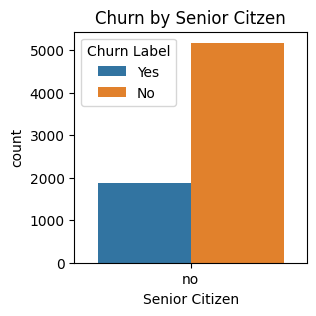

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x = "Senior Citizen", data = df, hue = "Churn Label")
plt.title("Churn by Senior Citzen")
plt.show()

**Comparatively, a greater percentage of people in senior citzen category have Churned**

# **Showing the "Tenure_Months" through Barplot**

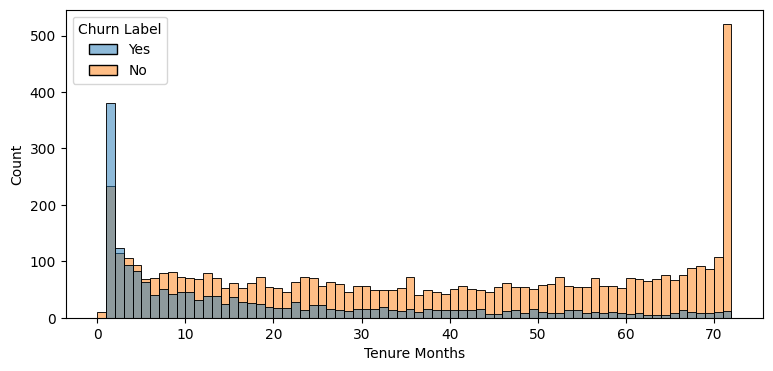

In [ ]:
plt.figure(figsize=(9,4))
sns.histplot(x= "Tenure Months", data = df, hue = "Churn Label", bins = 72)
plt.show()

**People who have used our service for a long time have stayed and people who have used our service for 1 or 2 months have been Churned**

# **Making Comparasion through Barplot**

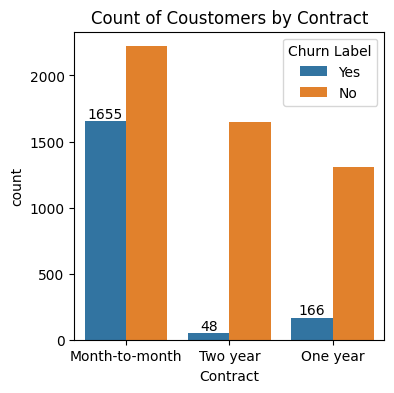

In [ ]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn Label")
ax.bar_label(ax.containers[0])
plt.title("Count of Coustomers by Contract")
plt.show()

**People who have month to month contract are likely to churn then from those who have 1 or 2 years og contract**

In [ ]:
df.columns.values

array(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score',
       'CLTV', 'Churn Reason'], dtype=object)

**Data Visualization of  all the columns in the data which we had.**

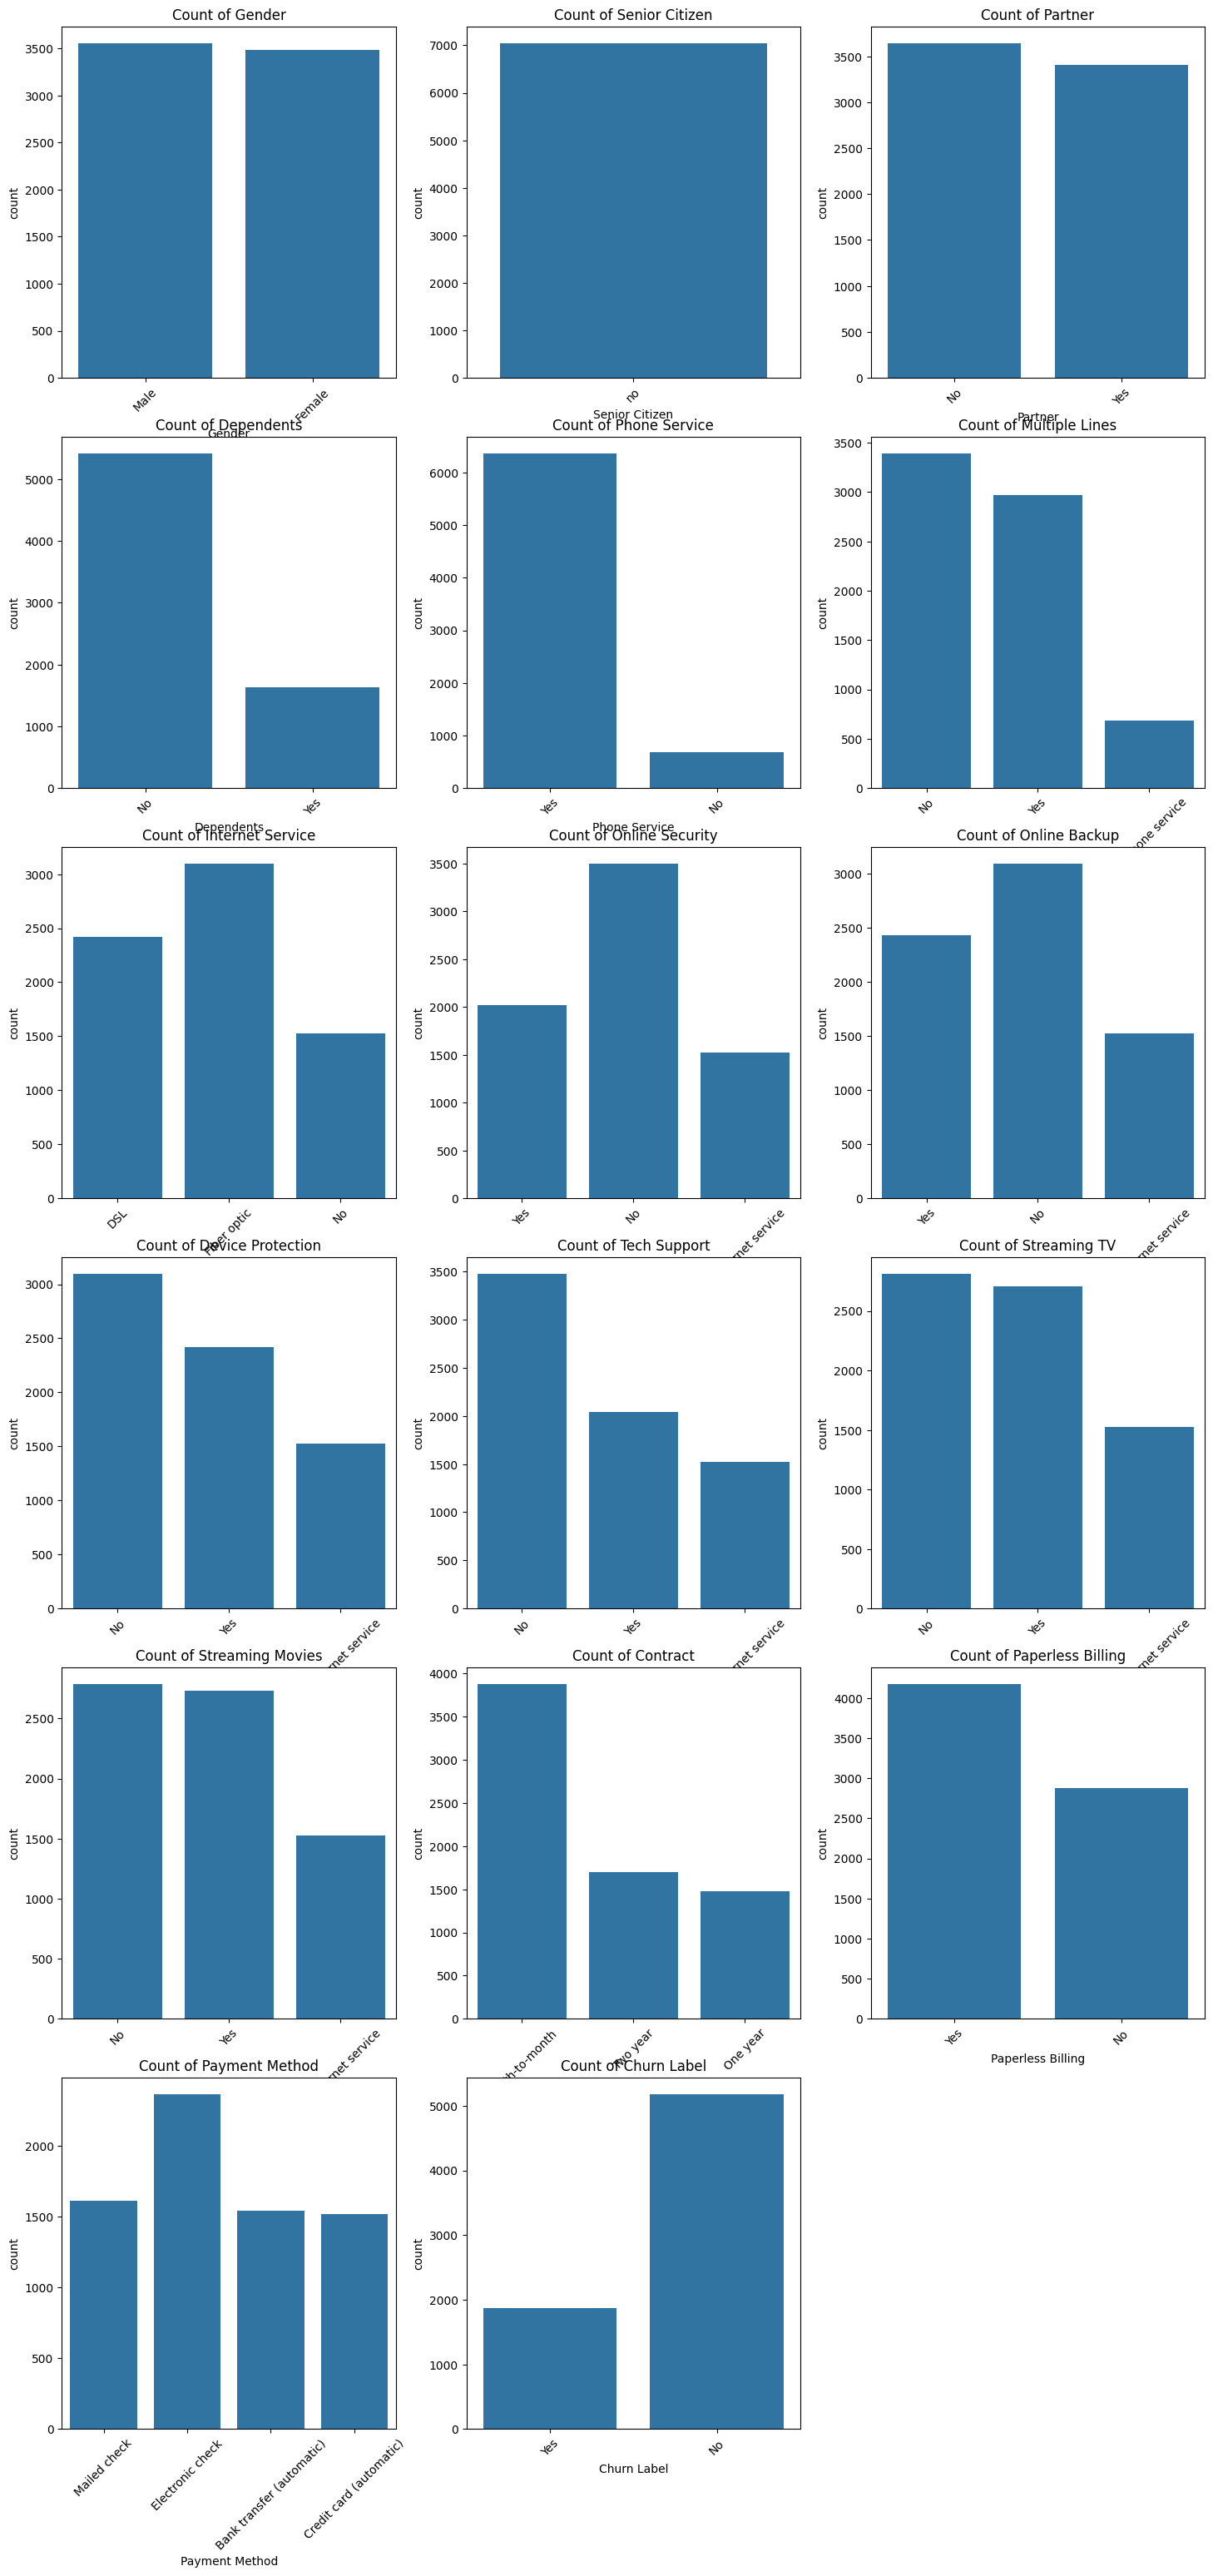

In [ ]:
columns_to_plot = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
                   'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',
                   'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
                   'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label']

n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
fig.tight_layout(pad=3.0)

axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Count of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

# **Again, Making the Comparasion through Barplot**

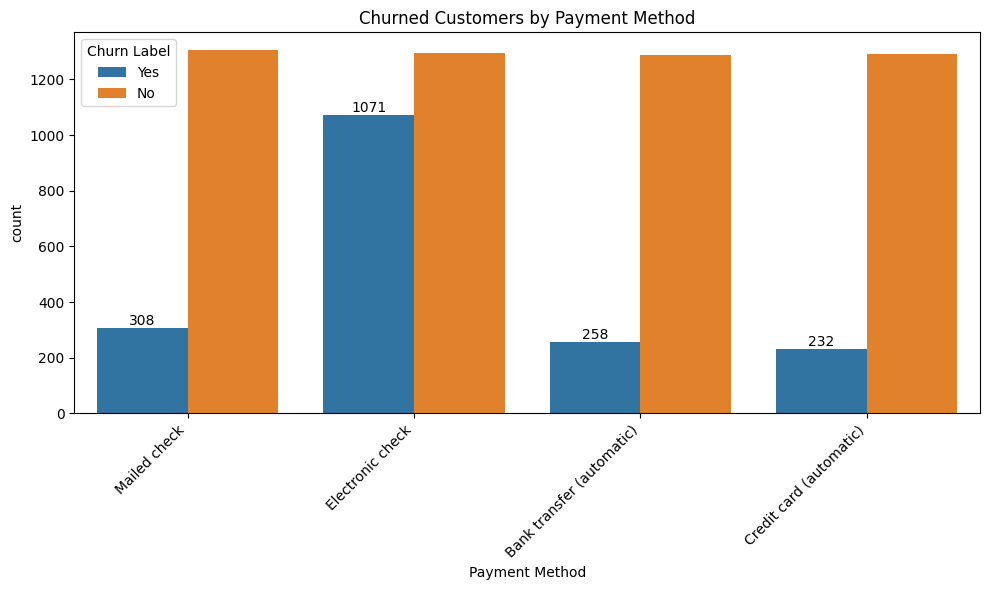

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x = "Payment Method", data = df, hue = "Churn Label")
ax.bar_label(ax.containers[0])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Customer is likely to churn when he is using electronic check as a payment method.**

# **Conclusion**

**In above dataset, we had perform EDA(Exploratory Data Analysis) in which we check the null values in the dataset, get the information about this dataset like numbers of rows and columns, name of the columns and statistical measure of the dataset. We also check the duplicate values in this dataset. We also do data visualization of this dataset through barplot, piechart etc.**